# Survival Analysis Lab

Complete the following exercises to solidify your knowledge of survival analysis.

In [65]:
import pandas as pd
import plotly.plotly as py
import cufflinks as cf
from lifelines import KaplanMeierFitter
import plotly.graph_objs as go

cf.go_offline()

In [66]:
# ! pip install lifelines
# ! pip install chart-studio

if you have any issue running the following code, you can try to downgrade your plotly lib
- https://github.com/plotly/plotly.py/issues/1660
- https://plot.ly/python/v4-migration/

In [67]:
# ! pip install plotly==3.10.0

In [68]:
import plotly
plotly.__version__

'3.10.0'

### import pandas as pd
import plotly.plotly as py
import cufflinks as cf
from lifelines import KaplanMeierFitter
import plotly.graph_objs as go

# switch back to online mode, where graphs are saved on your online plotly account
#cf.go_offline()

In [90]:
data = pd.read_csv('../data/attrition.csv')

In [91]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [92]:
data.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [71]:
data.head().T

,0,1,2,3,4
Age,41,49,37,33,27
Attrition,1,0,1,0,0
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
EmployeeNumber,1,2,4,5,7


## 1. Generate and plot a survival function that shows how employee retention rates vary by gender and employee age.

*Tip: If your lines have gaps in them, you can fill them in by using the `fillna(method=ffill)` and the `fillna(method=bfill)` methods and then taking the average. We have provided you with a revised survival function below that you can use for the exercises in this lab*

In [72]:
def survival(data, group_field, time_field, event_field):
    kmf = KaplanMeierFitter()
    results = []

    for i in data[group_field].unique():
        group = data[data[group_field]==i]
        T = group[time_field]
        E = group[event_field]
        kmf.fit(T, E, label=str(i))
        results.append(kmf.survival_function_)

    survival = pd.concat(results, axis=1)
    front_fill = survival.fillna(method='ffill')
    back_fill = survival.fillna(method='bfill')
    smoothed = (front_fill + back_fill) / 2
    return smoothed

In [73]:
surv_gender_age = survival(data, 'Gender', 'Age', 'Attrition')

In [74]:
surv_gender_age.head()

,Female,Male
timeline,,
0.0,1.000000,1.000000
18.0,0.998299,0.996599
19.0,0.994880,0.992058
20.0,0.988019,0.989786
21.0,0.979413,0.988645


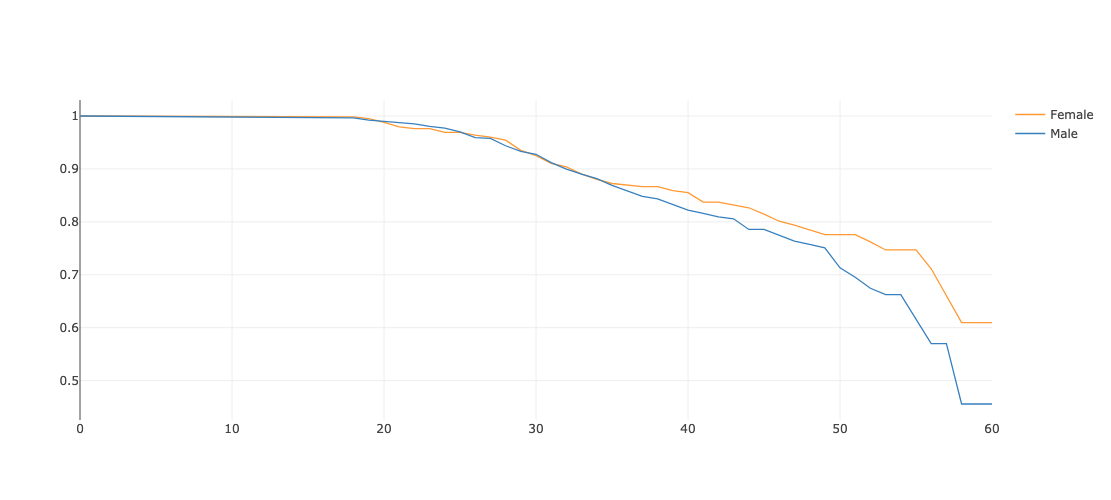

In [75]:
surv_gender_age.iplot(kind='line', 
          xTitle='Age', 
          yTitle='Attrition', 
          layout=go.Layout(autosize=False,width=500,height=500))

## 2. Compare the plot above with one that plots employee retention rates by gender over the number of years the employee has been working for the company.

In [76]:
sur_gender_ycompany = survival(data, 'Gender', 'YearsAtCompany', 'Attrition')

In [77]:
sur_gender_ycompany.head()

,Female,Male
timeline,,
0.0,0.993197,0.986395
1.0,0.956797,0.942452
2.0,0.938000,0.920975
3.0,0.923879,0.902917
4.0,0.912585,0.881528


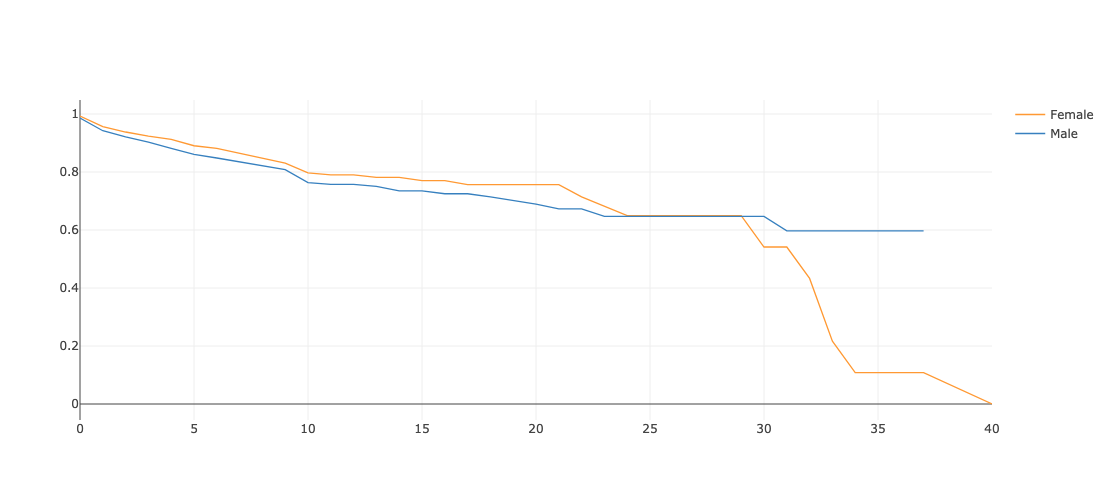

In [78]:
sur_gender_ycompany.iplot(kind='line', 
                          xTitle='Years at company', 
                          yTitle='Attrition', 
                          layout=go.Layout(autosize=False,width=500,height=500))

## 3. Let's look at retention rate by gender from a third perspective - the number of years since the employee's last promotion. Generate and plot a survival curve showing this.

In [79]:
surv_gender_yLasProm = survival(data, 'Gender', 'YearsSinceLastPromotion', 'Attrition')

In [80]:
surv_gender_yLasProm.head()

,Female,Male
timeline,,
0.0,0.931973,0.920635
1.0,0.882785,0.868425
2.0,0.854697,0.812757
3.0,0.828797,0.797127
4.0,0.817041,0.783841


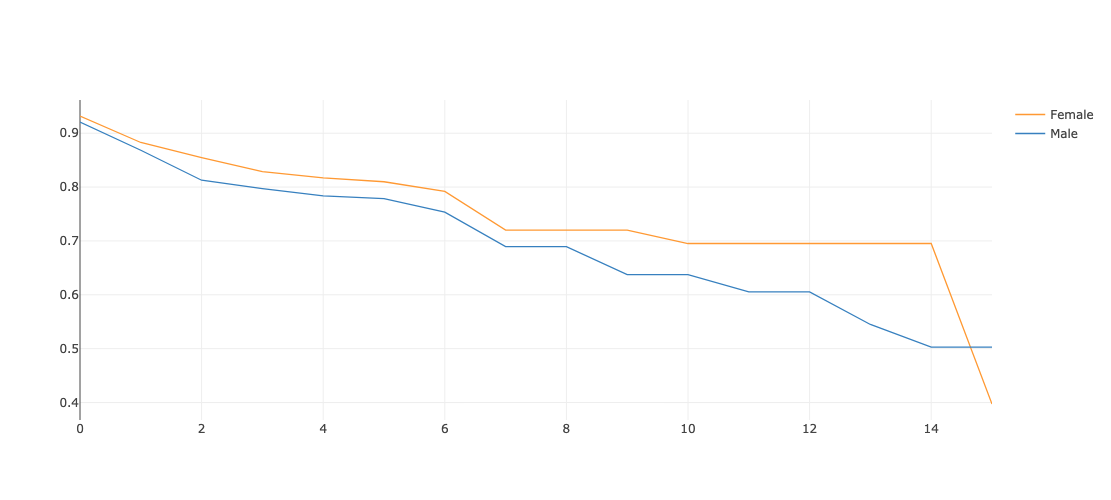

In [81]:
surv_gender_yLasProm.iplot(kind='line', 
            xTitle = 'Years since last promotion', 
            yTitle='Attrition', 
            layout=go.Layout(autosize=False,width=500,height=500))

## 4. Let's switch to looking at retention rates from another demographic perspective: marital status. Generate and plot survival curves for the different marital statuses by number of years at the company.

In [82]:
surv_marital_yComp = survival(data, 'MaritalStatus', 'YearsAtCompany', 'Attrition')

In [83]:
surv_marital_yComp.head()

,Single,Married,Divorced
timeline,,,
0.0,0.970213,0.997028,1.000000
1.0,0.904361,0.965353,0.975232
2.0,0.873585,0.950602,0.958063
3.0,0.858123,0.938070,0.932069
4.0,0.826763,0.932018,0.912153


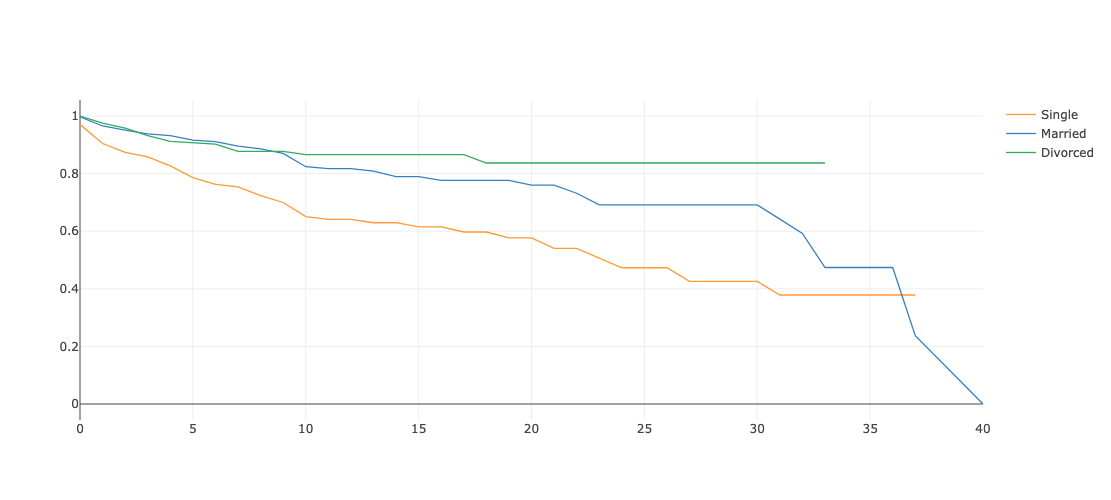

In [84]:
surv_marital_yComp.iplot(kind='line', 
           xTitle='Years at company', 
           yTitle='Attrition', 
           layout=go.Layout(autosize=False,width=500,height=500))

## 5. Let's also look at the marital status curves by employee age. Generate and plot the survival curves showing retention rates by marital status and age.

In [85]:
surv_marital_age = survival(data, 'MaritalStatus', 'Age', 'Attrition')

In [20]:
surv_marital_age.head()

,Single,Married,Divorced
timeline,,,
0.0,1.000000,1.000000,1.0
18.0,0.991489,0.997771,1.0
19.0,0.978613,0.997771,1.0
20.0,0.965651,0.997771,1.0
21.0,0.952543,0.997771,1.0


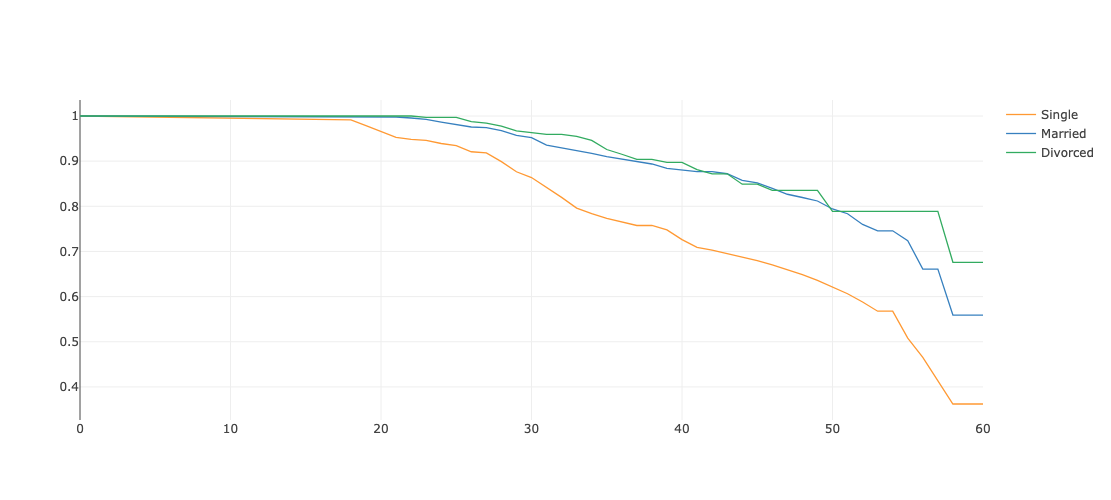

In [21]:
surv_marital_age.iplot(kind='line', 
                       xTitle='Age', 
                       yTitle='Attrition', 
                       title='Attrition by age & marital status', 
                       layout=go.Layout(autosize=False,width=500,height=500))


## 6.1. Now that we have looked at the retention rates by gender and marital status individually, let's look at them together. 

Create a new field in the data set that concatenates marital status and gender, and then generate and plot a survival curve that shows the retention by this new field over the age of the employee.

In [22]:
data['MaritalGender'] = data['MaritalStatus'] + ' ' + data['Gender']

In [23]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MaritalGender
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,Single Female
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,Married Male
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,Single Male
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,Married Female
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,Married Male


In [24]:
surv_MaritalGend_age = survival(data, 'MaritalGender', 'Age', 'Attrition')

In [25]:
surv_MaritalGend_age.head()

,Single Female,Married Male,Single Male,Married Female,Divorced Male,Divorced Female
timeline,,,,,,
0.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0
18.0,0.994975,0.998753,0.988930,0.996324,1.0,1.0
19.0,0.984770,0.998753,0.974114,0.996324,1.0,1.0
20.0,0.964147,0.998753,0.966678,0.996324,1.0,1.0
21.0,0.938089,0.998753,0.962917,0.996324,1.0,1.0


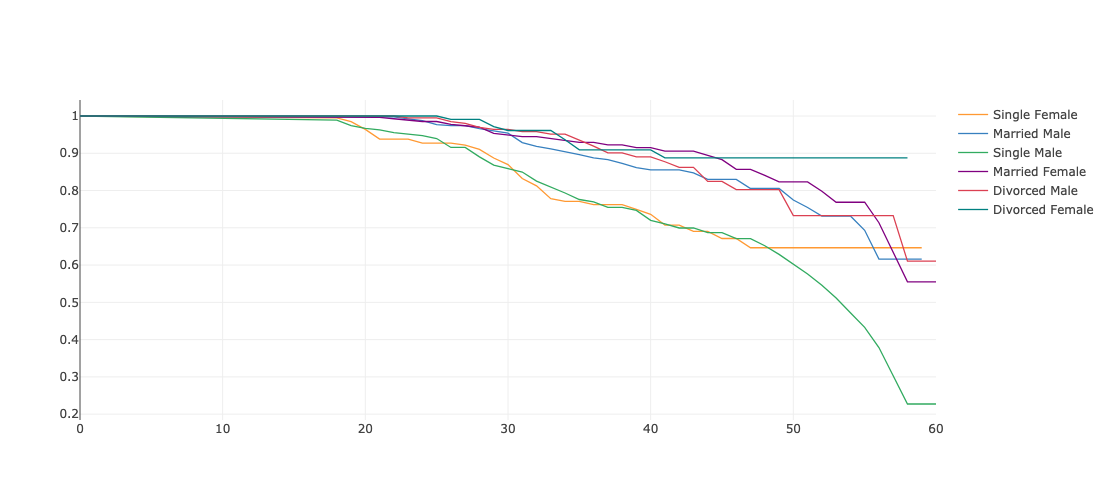

In [26]:
surv_MaritalGend_age.iplot(kind='line',
           xTitle='Age', 
           yTitle='Attrition', 
           layout=go.Layout(autosize=False,width=500,height=500))

## 6.2. Let's find out how job satisfaction affects retention rates. Generate and plot survival curves for each level of job satisfaction by number of years at the company.

In [27]:
surv_jobSats_yComp = survival(data, 
                'JobSatisfaction', 
                'YearsAtCompany', 
                'Attrition')

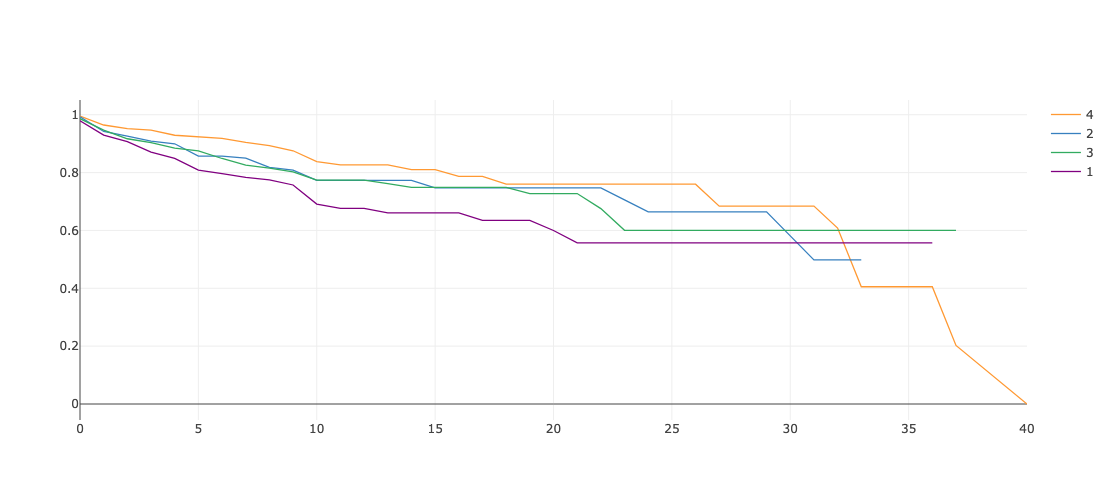

In [28]:
surv_jobSats_yComp.iplot(kind='line', 
           xTitle='Years at company', 
           yTitle='Attrition', 
           title='Attrition by years at company and job satisfaction', layout=go.Layout(autosize=False,width=500,height=500))

## 7. Let's investigate whether the department the employee works in has an impact on how long they stay with the company. Generate and plot survival curves showing retention by department and years the employee has worked at the company.

In [29]:
surv_dep_yComp = survival(data, 
                 'Department', 
                 'YearsAtCompany', 
                 'Attrition')

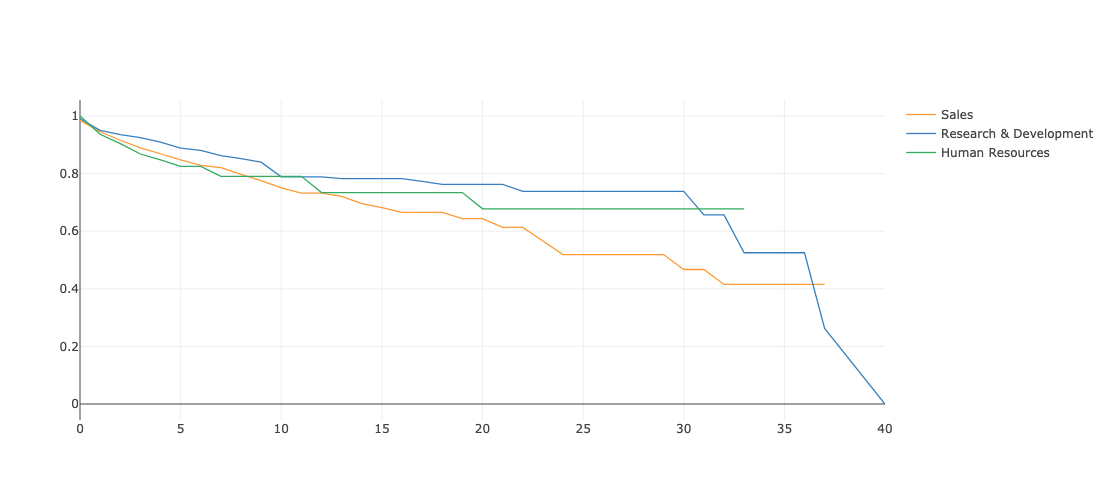

In [30]:
surv_dep_yComp.iplot(kind='line', 
                     xTitle='Years at company', 
                     yTitle='Attrition', 
                     title= 'Attrition by years at company and department', 
                     layout=go.Layout(autosize=False,width=500,height=500))


## 8. From the previous example, it looks like the sales department has the highest attrition. Let's drill down on this and look at what the survival curves for specific job roles within that department look like.

Filter the data set for just the sales department and then generate and plot survival curves by job role and the number of years at the company.

In [31]:
sales = data[data['Department']=='Sales']

In [33]:
sales.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MaritalGender
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,Single Female
18,53,0,Travel_Rarely,1219,Sales,2,4,Life Sciences,1,23,...,80,0,31,3,3,25,8,3,7,Married Female
21,36,1,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,80,0,10,4,3,5,3,0,3,Single Male
27,42,0,Travel_Rarely,691,Sales,8,4,Marketing,1,35,...,80,1,10,2,3,9,7,4,2,Married Male
29,46,0,Travel_Rarely,705,Sales,2,4,Marketing,1,38,...,80,0,22,2,2,2,2,2,1,Single Female


In [34]:
surv_jobRole_yComp = survival(sales, 
                              'JobRole', 
                              'YearsAtCompany', 
                              'Attrition')


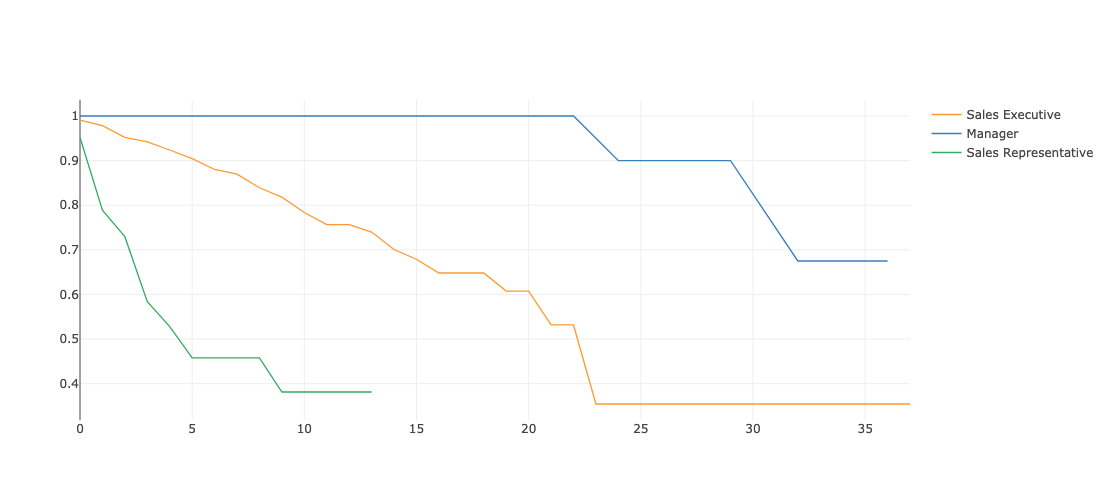

In [35]:
surv_jobRole_yComp.iplot(kind='line', 
                         xTitle='Years at company', 
                         yTitle='Attrition', 
                         layout=go.Layout(autosize=False,width=700,height=500))


## 9. Let examine how compensation affects attrition.

- Use the `pd.qcut` method to bin the HourlyRate field into 5 different pay grade categories (Very Low, Low, Moderate, High, and Very High).
- Generate and plot survival curves showing employee retention by pay grade and age.

In [36]:
data['PayGrade'] = pd.qcut(
    # variable that will be cut
    data['HourlyRate'], 
    # number of cuts
    5, 
    # label from each part
    labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])

In [37]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MaritalGender,PayGrade
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,Single Female,Very High
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,Married Male,Moderate
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,7,3,3,0,0,0,0,Single Male,Very High
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,8,3,3,8,7,3,0,Married Female,Low
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,6,3,3,2,2,2,2,Married Male,Very Low


In [38]:
surv_playGrade_age = survival(data, 'PayGrade', 'Age', 'Attrition')

In [39]:
surv_playGrade_age.head()

,Very High,Moderate,Low,Very Low,High
timeline,,,,,
0.0,1.000000,1.000000,1.000000,1.000000,1.000000
18.0,1.000000,0.992857,0.996644,1.000000,0.996795
19.0,0.992674,0.991058,0.986577,0.996721,0.996795
20.0,0.989011,0.989260,0.979820,0.993443,0.993579
21.0,0.981685,0.985663,0.979820,0.983541,0.990343


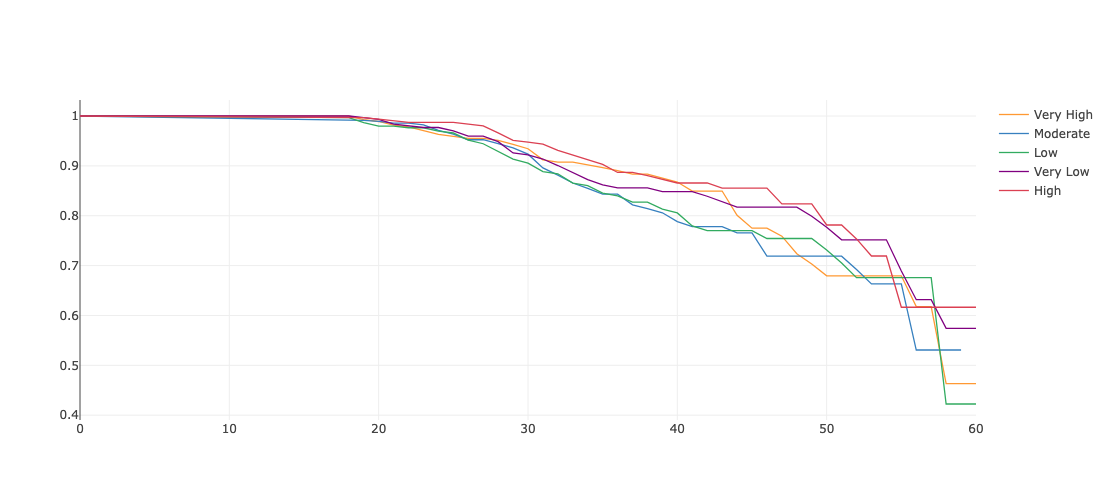

In [40]:
surv_playGrade_age.iplot(kind='line', 
                         xTitle='Age', 
                         yTitle='Attrition', 
                         layout=go.Layout(autosize=False,width=500,height=500))

## 10. Finally, let's take a look at how the demands of the job impact employee attrition.

- Create a new field whose values are 'Overtime' or 'Regular Hours' depending on whether there is a Yes or a No in the OverTime field.
- Create a new field that concatenates that field with the BusinessTravel field.
- Generate and plot survival curves showing employee retention based on these conditions and employee age.

In [106]:
data['Overtime_rec'] = data['OverTime'].apply(lambda x: 'Overtime' if x == 'Yes' else 'Regular Hours')

In [101]:
data.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [103]:
data.Overtime_rec.value_counts()

Regular Hours    1054
Overtime          416
Name: Overtime_rec, dtype: int64

In [104]:
data['Conditions'] = data['Overtime_rec'] + ' ' + data['BusinessTravel']

In [105]:
data.Conditions.value_counts()

Regular Hours Travel_Rarely        748
Overtime Travel_Rarely             295
Regular Hours Travel_Frequently    191
Regular Hours Non-Travel           115
Overtime Travel_Frequently          86
Overtime Non-Travel                 35
Name: Conditions, dtype: int64

In [70]:
surv_Cond_Age = survival(data, 'Conditions', 'Age', 'Attrition')

In [71]:
surv_Cond_Age.iplot(kind='line', 
                    xTitle='Age', 
                    yTitle='Attrition',
                    title='how the demands of the job impact employee attrition', 
                    layout=go.Layout(autosize=False,width=700,height=500))